# Encontrar raízes - Método da Bisseção

In [ ]:
import sympy as sp
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [ ]:
x = sp.Symbol('x')

### Entrada

In [ ]:
expr = x + sp.log(x)
intervalo = (0.1, 0.9)
n_casas_decimais = 6
tol = 0.03

### Saída

In [ ]:
def bisection(f, intervalo, tol):

  a, b = intervalo

  k = 1
  while True:

    print(f'[{k} Tentativa]', end='\n\n')

    erro = (b - a) / 2
    p_medio = (a + b) / 2

    print(f'Escolhido = [{round(p_medio - erro, n_casas_decimais)} ; {round(p_medio + erro, n_casas_decimais)}]')
    print(f'X{k - 1} = {round(p_medio, n_casas_decimais)}')
    print(f'erro = {round(erro, n_casas_decimais)}', end='\n\n')

    ant_a, ant_b = a, b

    if f(a) * f(p_medio) < 0:
      b = p_medio
    else:
      a = p_medio

    if tol > erro:
      break

    print(f"[{ant_a} ; {p_medio}]  [{p_medio} ; {ant_b}]", end='\n\n')

    sinal = lambda x: "< 0" if f(x) < 0 else "> 0"

    for val in (ant_a, p_medio, ant_b):
         print(f'f({val}) = {round(f(val), n_casas_decimais)} {sinal(val)}')
    print()

    k += 1

  return p_medio

In [ ]:
f = sp.lambdify(x, expr)
res = bisection(f, intervalo, tol)

print("Resultado final = ", res)

[1 Tentativa]

Escolhido = [0.1 ; 0.9]
X0 = 0.5
erro = 0.4

[0.1 ; 0.5]  [0.5 ; 0.9]

f(0.1) = -2.202585 < 0
f(0.5) = -0.193147 < 0
f(0.9) = 0.794639 > 0

[2 Tentativa]

Escolhido = [0.5 ; 0.9]
X1 = 0.7
erro = 0.2

[0.5 ; 0.7]  [0.7 ; 0.9]

f(0.5) = -0.193147 < 0
f(0.7) = 0.343325 > 0
f(0.9) = 0.794639 > 0

[3 Tentativa]

Escolhido = [0.5 ; 0.7]
X2 = 0.6
erro = 0.1

[0.5 ; 0.6]  [0.6 ; 0.7]

f(0.5) = -0.193147 < 0
f(0.6) = 0.089174 > 0
f(0.7) = 0.343325 > 0

[4 Tentativa]

Escolhido = [0.5 ; 0.6]
X3 = 0.55
erro = 0.05

[0.5 ; 0.55]  [0.55 ; 0.6]

f(0.5) = -0.193147 < 0
f(0.55) = -0.047837 < 0
f(0.6) = 0.089174 > 0

[5 Tentativa]

Escolhido = [0.55 ; 0.6]
X4 = 0.575
erro = 0.025

Resultado final =  0.575


### Raiza exata

In [ ]:
exata = fsolve(sp.lambdify(x, expr), intervalo)[0]
round(exata, n_casas_decimais)

0.567143

### Gráfico

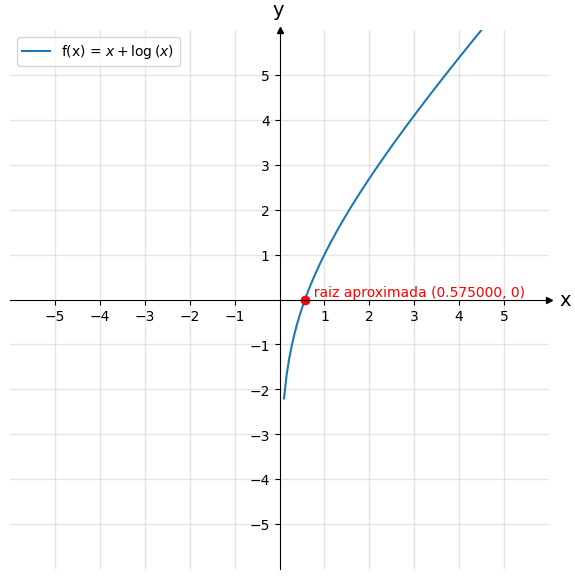

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))

#Define o dominio e a imagem do grafico
a, b = intervalo
dom = np.linspace(a, b+5, 100)
img = f(dom)

#Desenha a função e a ponto de interseccão com o eixo x
ax.plot(dom, img, label=f'f(x) = ${sp.latex(expr)}$')
ax.plot(res, [0], 'ro')
plt.text(res, 0, f'  raiz aproximada ({res:.{n_casas_decimais}f}, 0)', fontsize=10, verticalalignment='bottom', c='r')
ax.legend()

# Selecione o comprimento dos eixos e o espaço entre os rótulos dos ticks
xmin, xmax, ymin, ymax = -5, 5, -5, 5
ticks_frequency = 1

# Defina escalas idênticas para ambos os eixos
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

# Coloca os eixos inferior e da esquerda como eixos x e y do sistema de coordenadas
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove a linha superior e  da direita
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Crie rótulos 'x' e 'y' colocados no final dos eixos
ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)

# Crie ticks principais personalizados para determinar a posição dos rótulos dos ticks
x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

# Desenhe linhas de grade principais e menores
ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

# Desenha as setas
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

plt.show()
